In [80]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [81]:
!pip install tensorflow keras numpy matplotlib pandas sklearn biopython

In [82]:
#import the libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re, ast
import keras
np.random.seed(1000)
from keras.optimizers import SGD
from keras.layers import BatchNormalization
import tensorflow as tf
from sklearn.metrics import auc

In [83]:
#Load the data
NP_list=[]
X=pd.read_csv('/content/drive/My Drive/Glutarylation/train_Binary_Encoding.csv').Image_Array
Y=pd.read_csv('/content/drive/My Drive/Glutarylation/train_Binary_Encoding.csv').Glutarylation
y_train=np.array(Y)
print(y_train[0])
for i in X:
    NP=np.array(ast.literal_eval(i))
    NP_list.append(NP)
print(NP_list[0])
X_train=np.array(NP_list)

0
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 

In [84]:
#Load the test data
np_list=[]
x=pd.read_csv('/content/drive/My Drive/Glutarylation/test_Binary_Encoding.csv').Image_Array
y=pd.read_csv('/content/drive/My Drive/Glutarylation/test_Binary_Encoding.csv').Glutarylation
y_test=np.array(y)
print(y_test[0])
for i in x:
    npp=np.array(ast.literal_eval(i))
    np_list.append(npp)
print(np_list[0])
X_test=np.array(np_list)

0
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 

In [85]:
# #split data into train and test sets
# X_train,X_val,y_train,y_val=train_test_split(image,level,validation_split=0.2,random_state=20)
print(len(X_train))
print(len(X_test))

4088
484


In [86]:
X_train[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
y_train[0]

0

In [88]:
#Reshape the data to fit the model
X_train = X_train.reshape(4088,35,21,1)
X_test = X_test.reshape(484,35,21,1)

In [89]:
#One-Hot Encode target column (Y-Data sets) : Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 

In [90]:
#Build the CNN model
model = Sequential()

In [91]:
# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(35,21,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [92]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 33, 19, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 9, 64)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 7, 32)         18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 3, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 1, 16)          4624      
_________________________________________________________________
flatten_4 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                

In [93]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
#Train the model
#Batch: Total number of training examples present in a single batch (None = default 32)
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
#Fit: Another word for train
hist = model.fit(X_train, y_train_one_hot, validation_split=0.20, epochs=10)

Epoch 1/10
103/103 [==============================] - 3s 33ms/step - loss: 0.4293 - accuracy: 0.8547 - val_loss: 0.4083 - val_accuracy: 0.8594
Epoch 2/10
103/103 [==============================] - 3s 32ms/step - loss: 0.4138 - accuracy: 0.8547 - val_loss: 0.4063 - val_accuracy: 0.8594
Epoch 3/10
103/103 [==============================] - 3s 32ms/step - loss: 0.4072 - accuracy: 0.8547 - val_loss: 0.4017 - val_accuracy: 0.8594
Epoch 4/10
103/103 [==============================] - 3s 31ms/step - loss: 0.3996 - accuracy: 0.8547 - val_loss: 0.3995 - val_accuracy: 0.8594
Epoch 5/10
103/103 [==============================] - 3s 32ms/step - loss: 0.3870 - accuracy: 0.8554 - val_loss: 0.4007 - val_accuracy: 0.8594
Epoch 6/10
103/103 [==============================] - 3s 32ms/step - loss: 0.3719 - accuracy: 0.8550 - val_loss: 0.4076 - val_accuracy: 0.8594
Epoch 7/10
103/103 [==============================] - 3s 32ms/step - loss: 0.3506 - accuracy: 0.8593 - val_loss: 0.4119 - val_accuracy: 0.8496

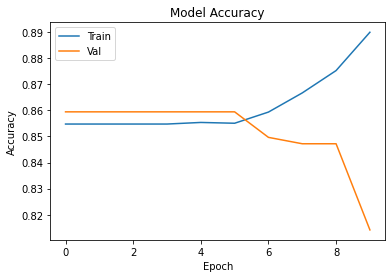

In [95]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [96]:
#Show predictions as probabilites for the first 4 images in the test set
predictions = model.predict(X_test)
predictions

array([[0.8342591 , 0.16574088],
       [0.9871307 , 0.01286932],
       [0.8058532 , 0.19414674],
       [0.98294824, 0.01705172],
       [0.82684207, 0.17315796],
       [0.9578304 , 0.0421696 ],
       [0.99292374, 0.00707627],
       [0.96620095, 0.033799  ],
       [0.37824494, 0.62175506],
       [0.81250393, 0.1874961 ],
       [0.98244184, 0.01755819],
       [0.9247169 , 0.07528311],
       [0.88249815, 0.11750185],
       [0.6670486 , 0.33295146],
       [0.6898681 , 0.31013188],
       [0.854815  , 0.14518505],
       [0.9359968 , 0.06400318],
       [0.98185515, 0.01814482],
       [0.9649637 , 0.03503625],
       [0.9745027 , 0.02549735],
       [0.5164222 , 0.4835778 ],
       [0.8700128 , 0.1299872 ],
       [0.9396894 , 0.06031058],
       [0.63952106, 0.36047894],
       [0.30057818, 0.6994218 ],
       [0.9878577 , 0.01214225],
       [0.99239653, 0.00760347],
       [0.17125566, 0.8287443 ],
       [0.9715505 , 0.02844947],
       [0.5805202 , 0.41947982],
       [0.

In [97]:
#Print our predicitons as number labels for the first 4 images
y_pred=(np.argmax(predictions,axis=1))
print(y_pred[:4])
#Print the actual labels
print(y_test[:4])

[0 0 0 0]
[0 0 0 1]


In [98]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 33, 19, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 9, 64)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 7, 32)         18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 3, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 1, 16)          4624      
_________________________________________________________________
flatten_4 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                

In [99]:
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train_one_hot)
print(f'Test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

128/128 [==============================] - 1s 9ms/step - loss: 0.2865 - accuracy: 0.8897
Test results - Loss: 0.2864930331707001 - Accuracy: 88.9677107334137%


In [100]:
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

16/16 [==============================] - 0s 8ms/step - loss: 0.4326 - accuracy: 0.8492
Test results - Loss: 0.43257084488868713 - Accuracy: 84.91735458374023%


In [101]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_test,y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Report : ')
print (classification_report(y_test,y_pred))

Confusion Matrix :
[[408  20]
 [ 53   3]]
Accuracy Score : 0.8491735537190083
Report : 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       428
           1       0.13      0.05      0.08        56

    accuracy                           0.85       484
   macro avg       0.51      0.50      0.50       484
weighted avg       0.80      0.85      0.82       484



In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print(lr_auc)

0.5345043391188251


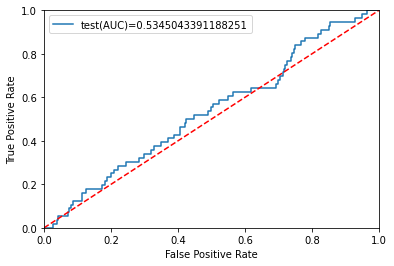

In [103]:
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, lr_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.plot(test_fpr,test_tpr,label="test(AUC)="+str(lr_auc))
# show the legend
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.legend()
# show the plot
pyplot.show()